In [1]:
import pandas as pd

In [2]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

In [3]:
data = pd.read_csv(uri)

In [4]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [5]:
from datetime import datetime

data['age'] = datetime.today().year - data['model_year']

In [6]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age
0,0,21801,2000,30941.02,yes,19
1,1,7843,1998,40557.96,yes,21
2,2,7109,2006,89627.50,no,13
3,3,26823,2015,95276.14,no,4
4,4,7935,2014,117384.68,yes,5


In [7]:
yes_or_no_to_one_or_zero = {
    'yes': 1,
    'no': 0
}

data['sold'] = data['sold'].map(yes_or_no_to_one_or_zero)

In [8]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age
0,0,21801,2000,30941.02,1,19
1,1,7843,1998,40557.96,1,21
2,2,7109,2006,89627.50,0,13
3,3,26823,2015,95276.14,0,4
4,4,7935,2014,117384.68,1,5


In [9]:
data['km_per_year'] = data['mileage_per_year'] * 1.60934

In [10]:
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,age,km_per_year
0,0,21801,2000,30941.02,1,19,35085.22134
1,1,7843,1998,40557.96,1,21,12622.05362
2,2,7109,2006,89627.50,0,13,11440.79806
3,3,26823,2015,95276.14,0,4,43167.32682
4,4,7935,2014,117384.68,1,5,12770.11290


In [11]:
x = data[['price', 'age', 'km_per_year']]
y = data['sold']

In [12]:
x.head()

,price,age,km_per_year
0,30941.02,19,35085.22134
1,40557.96,21,12622.05362
2,89627.50,13,11440.79806
3,95276.14,4,43167.32682
4,117384.68,5,12770.11290


In [13]:
y.head()

0    1
1    1
2    0
3    0
4    1
Name: sold, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
import numpy as np

np.random.seed(5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

dummy = DummyClassifier('most_frequent')
dummy.fit(x_train, y_train)
dummy.score(x_test, y_test)

0.58

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import numpy as np

np.random.seed(5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

linear = LinearSVC()
linear.fit(x_train, y_train)
linear.score(x_test, y_test)

/home/flavio/dev/cursos/alura/curso_machine_learning_introducao_a_classificacao/venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5788

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

np.random.seed(5)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

scaler = StandardScaler()
scaler.fit(x_train, y_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_test, y_test)

0.7748

In [17]:
import seaborn as sns

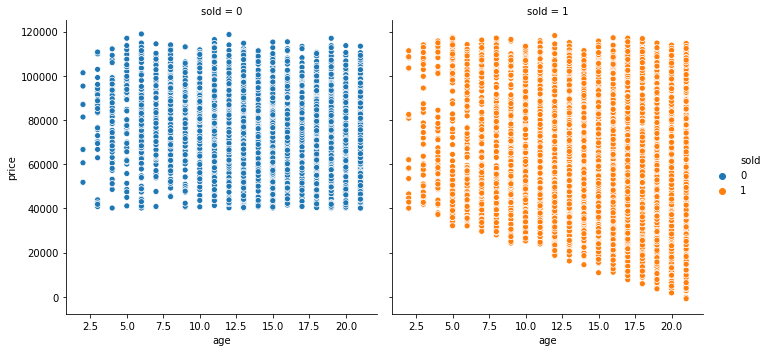

In [18]:
sns.relplot(x='age', y='price', col='sold', hue='sold', data=data)

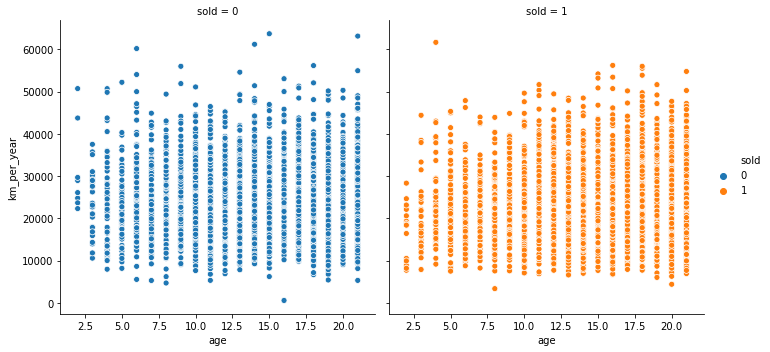

In [19]:
sns.relplot(x='age', y='km_per_year', col='sold', hue='sold', data=data)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np

np.random.seed(5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)


tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree.score(x_test, y_test)

0.7332

In [34]:
dot_file = export_graphviz(decision_tree=tree,
                          max_depth=2,
                          rounded=True,
                          feature_names=x.columns,
                          filled=True,
                          class_names=['no', 'yes'])

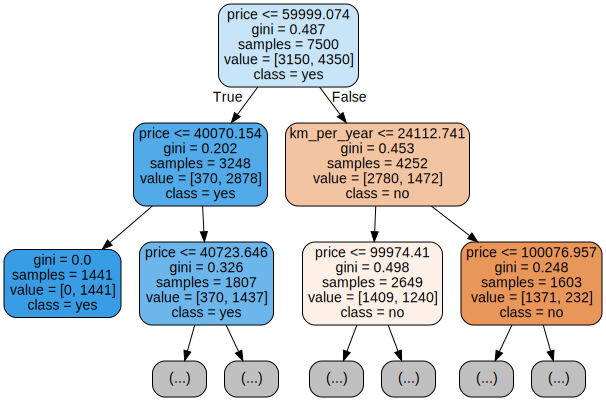

In [35]:
import graphviz

graphviz.Source(dot_file)